<a href="https://www.kaggle.com/erlancassiano/violence-in-rio-de-janeiro?scriptVersionId=87085330" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

**Violence in Rio de Janeiro**

The Instituto de Segurança Pública (ISP) makes available a series of data related to violence in Rio de Janeiro. The objective here is to analyze the relationship between variables moved and removed from outliers.

O Instituto de Segurança Pública (ISP) disponibiliza uma série de dados relacionados à violência no Rio de Janeiro. O objetivo aqui é analisar o relacionamento entre as variáveis disponibilizadas e remoção de outliers.

* DOMensalEstadoDesde1991
* mes
* hom_doloso
* lesao_corp_morte
* latrocinio
* cvli
* hom_por_interv_policial
* letalidade_violenta
* tentat_hom
* lesao_corp_dolosa
* estupro
* hom_culposo
* lesao_corp_culposa
* roubo_transeunte
* roubo_celular
* roubo_em_coletivo
* roubo_rua
* roubo_veiculo
* roubo_carga
* roubo_comercio
* roubo_residencia
* roubo_banco
* roubo_cx_eletronico
* roubo_conducao_saque
* roubo_apos_saque
* roubo_bicicleta
* outros_roubos
* total_roubos
* furto_veiculos
* furto_transeunte
* furto_coletivo
* furto_celular
* furto_bicicleta
* outros_furtos
* total_furtos
* sequestro
* extorsao
* sequestro_relampago
* estelionato
* apreensao_drogas
* posse_drogas
* trafico_drogas
* apreensao_drogas_sem_autor
* recuperacao_veiculos
* apf
* aaapai
* cmp
* cmba
* ameaca
* pessoas_desaparecidas
* encontro_cadaver
* encontro_ossada
* pol_militares_mortos_serv
* pol_civis_mortos_serv
* registro_ocorrencias
* fase

# Initialization

In [1]:
#Visualization
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.style.use('seaborn-white')
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from tabulate import tabulate
import time

#Metrics (Computation)
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

# Goal: Analize and clean the date for future predciton analisys

# Importing data

In [2]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/DOMensalEstadoDesde1991-RJ/DOMensalEstadoDesde1991.csv


In [3]:
from pandas import read_csv

data = read_csv('../input/DOMensalEstadoDesde1991-RJ/DOMensalEstadoDesde1991.csv', sep=';', header = 0)
data.head(300) # checking table

,ano,mes,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,...,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
0,1991,1,657,,15,,,672,162,3051,...,,,,,217,,,,,3
1,1991,2,732,,17,,,749,175,3421,...,,,,,209,,,,,3
2,1991,3,713,,25,,,738,216,3613,...,,,,,188,,,,,3
3,1991,4,634,,20,,,654,200,3211,...,,,,,140,,,,,3
4,1991,5,650,,20,,,670,146,3051,...,,,,,78,,,,,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,2015,8,336,2,11,349,49,398,467,6268,...,1781,71,5993,487,45,1,0,0,63173,3
296,2015,9,351,0,6,357,58,415,598,6165,...,1671,93,5914,592,48,8,2,0,63327,3
297,2015,10,380,2,10,392,52,444,410,6531,...,1724,100,6422,509,34,2,0,0,64029,3
298,2015,11,340,5,5,350,47,397,479,6774,...,1649,97,6124,552,31,4,2,0,63006,3


**As we can observe, we have a great amount of empty data from 1991 up to 2014**

for this exercise of visualization we will replace the empty strings with 0, knowing that can affect the initial statistics

In [4]:
data = data.replace(r'^\s*$', 0, regex=True)

In [5]:
np.shape(data) # check size

(372, 56)

# Evaluating Data

In [6]:
data.describe().applymap('{:,.2f}'.format) # check statistics 

,ano,mes,hom_doloso,latrocinio,letalidade_violenta,tentat_hom,lesao_corp_dolosa,roubo_transeunte,roubo_em_coletivo,roubo_rua,...,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,outros_furtos,total_furtos,apreensao_drogas,recuperacao_veiculos,encontro_cadaver,fase
count,372.00,372.00,372.00,372.00,372.00,372.00,372.00,372.00,372.00,372.00,...,372.00,372.00,372.00,372.00,372.00,372.00,372.00,372.00,372.00,372.00
mean,"2,006.00",6.50,488.29,15.10,565.29,320.89,"5,409.31","3,458.16",672.03,"4,843.55",...,"1,221.78","9,516.57","1,634.90","1,476.20","5,990.90","10,383.24","1,124.70","1,738.63",63.00,2.99
std,8.96,3.46,123.92,6.05,111.76,123.96,"1,500.18","2,386.14",296.06,"3,135.86",...,773.55,"4,461.86",317.39,955.00,"1,908.05","3,604.22",647.16,648.89,35.10,0.09
min,"1,991.00",1.00,228.00,2.00,297.00,122.00,"2,350.00",688.00,281.00,"1,086.00",...,81.00,"3,261.00",904.00,255.00,"2,322.00","4,691.00",80.00,729.00,0.00,2.00
25%,"1,998.00",3.75,386.75,11.00,484.00,203.50,"4,031.00","1,076.75",439.00,"1,677.50",...,828.00,"5,386.00","1,390.75",732.00,"4,111.25","6,761.25",749.00,"1,210.75",38.00,3.00
50%,"2,006.00",6.50,493.50,14.00,578.50,324.00,"5,659.50","3,333.00",610.50,"4,681.50",...,"1,167.50","9,363.00","1,605.50","1,027.00","6,515.50","10,270.50","1,005.00","1,718.50",56.00,3.00
75%,"2,014.00",9.25,572.00,19.00,642.25,398.25,"6,525.75","5,356.50",803.25,"6,872.75",...,"1,624.50","11,590.50","1,822.00","2,260.00","7,535.25","13,797.50","1,726.75","2,172.25",84.25,3.00
max,"2,021.00",12.00,831.00,36.00,848.00,645.00,"9,050.00","9,669.00","1,628.00","13,833.00",...,"3,661.00","23,203.00","2,630.00","5,368.00","9,880.00","18,003.00","2,543.00","3,695.00",217.00,3.00


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 56 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ano                         372 non-null    int64 
 1   mes                         372 non-null    int64 
 2   hom_doloso                  372 non-null    int64 
 3   lesao_corp_morte            372 non-null    object
 4   latrocinio                  372 non-null    int64 
 5   cvli                        372 non-null    object
 6   hom_por_interv_policial     372 non-null    object
 7   letalidade_violenta         372 non-null    int64 
 8   tentat_hom                  372 non-null    int64 
 9   lesao_corp_dolosa           372 non-null    int64 
 10  estupro                     372 non-null    object
 11  hom_culposo                 372 non-null    object
 12  lesao_corp_culposa          372 non-null    object
 13  roubo_transeunte            372 non-null    int64 

we need to convert the objects to int

In [8]:
data = data.astype(str).astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 56 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ano                         372 non-null    int64
 1   mes                         372 non-null    int64
 2   hom_doloso                  372 non-null    int64
 3   lesao_corp_morte            372 non-null    int64
 4   latrocinio                  372 non-null    int64
 5   cvli                        372 non-null    int64
 6   hom_por_interv_policial     372 non-null    int64
 7   letalidade_violenta         372 non-null    int64
 8   tentat_hom                  372 non-null    int64
 9   lesao_corp_dolosa           372 non-null    int64
 10  estupro                     372 non-null    int64
 11  hom_culposo                 372 non-null    int64
 12  lesao_corp_culposa          372 non-null    int64
 13  roubo_transeunte            372 non-null    int64
 14  roubo_celu

In [9]:
data.isnull().sum()

ano                           0
mes                           0
hom_doloso                    0
lesao_corp_morte              0
latrocinio                    0
cvli                          0
hom_por_interv_policial       0
letalidade_violenta           0
tentat_hom                    0
lesao_corp_dolosa             0
estupro                       0
hom_culposo                   0
lesao_corp_culposa            0
roubo_transeunte              0
roubo_celular                 0
roubo_em_coletivo             0
roubo_rua                     0
roubo_veiculo                 0
roubo_carga                   0
roubo_comercio                0
roubo_residencia              0
roubo_banco                   0
roubo_cx_eletronico           0
roubo_conducao_saque          0
roubo_apos_saque              0
roubo_bicicleta               0
outros_roubos                 0
total_roubos                  0
furto_veiculos                0
furto_transeunte              0
furto_coletivo                0
furto_ce

In [10]:
data.isna()

,ano,mes,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,...,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
368,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
369,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
370,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


**There are no null values in the dataset as observed above so we don't need to treat any columns for null values.**


Now lets plot the boxplots to visualize possible outliers:

The *linear* algorithm uses the  Pth percentile value is found by taking that value with #(np + 0.5). If this is not an integer, take the interpolated value between  and . As an example, if S5 = (1, 2, 3, 4, 5) and p = 0.25, then #(np + 0.5) = #(1.75) and so Q1 = 1.75. 

The *exclusive* algorithm uses the median to divide the ordered dataset into two halves. If the sample is odd, it does not include the median in either half. Q1 is then the median of the lower half and Q3 is the median of the upper half.

The *inclusive* algorithm also uses the median to divide the ordered dataset into two halves, but if the sample is odd, it includes the median in both halves. Q1 is then the median of the lower half and Q3 the median of the upper half.

In [11]:
for k,v in data.items():
    fig = go.Figure()
    fig.add_trace(go.Box(y=v, quartilemethod="linear", name="Linear Quartile Mode"))
    fig.add_trace(go.Box(y=v, quartilemethod="inclusive", name="Inclusive Quartile Mode"))
    fig.add_trace(go.Box(y=v, quartilemethod="exclusive", name="Exclusive Quartile Mode"))
    fig.update_traces(boxpoints='all', jitter=0)
    fig.update_layout(title=k,height=600)
    fig.show()

Looks like "roubo" types have outliers.

Lets check the percentage of outliers in each collum.

IRQ = is a way to measure the spread of the middle 50% of a dataset. It is calculated as the difference between the first quartile* (the 25th percentile) and the third quartile (the 75th percentile) of a dataset. 


In [12]:
table = []

for idx, (k, v) in enumerate(data.items()):
        q1 = v.quantile(0.25) # first quantile 
        q3 = v.quantile(0.75) # third quantile 
        irq = q3 - q1 # Interquartile Range 
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)] # search why use this parameter
        perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]
        table.append([k,q1,q3,irq,len(v_col),round((perc),2)])
print(tabulate(table, headers=["Column","q1", "q3", "irq", "OUTLIERS un." , "OUTLIERS %"]))

Column                           q1        q3       irq    OUTLIERS un.    OUTLIERS %
--------------------------  -------  --------  --------  --------------  ------------
ano                         1998      2014        16                  0          0
mes                            3.75      9.25      5.5                0          0
hom_doloso                   386.75    572       185.25               0          0
lesao_corp_morte               0         5         5                  2          0.54
latrocinio                    11        19         8                  3          0.81
cvli                           0       517       517                  0          0
hom_por_interv_policial       20        90.5      70.5                0          0
letalidade_violenta          484       642.25    158.25               0          0
tentat_hom                   203.5     398.25    194.75               0          0
lesao_corp_dolosa           4031      6525.75   2494.75               0    

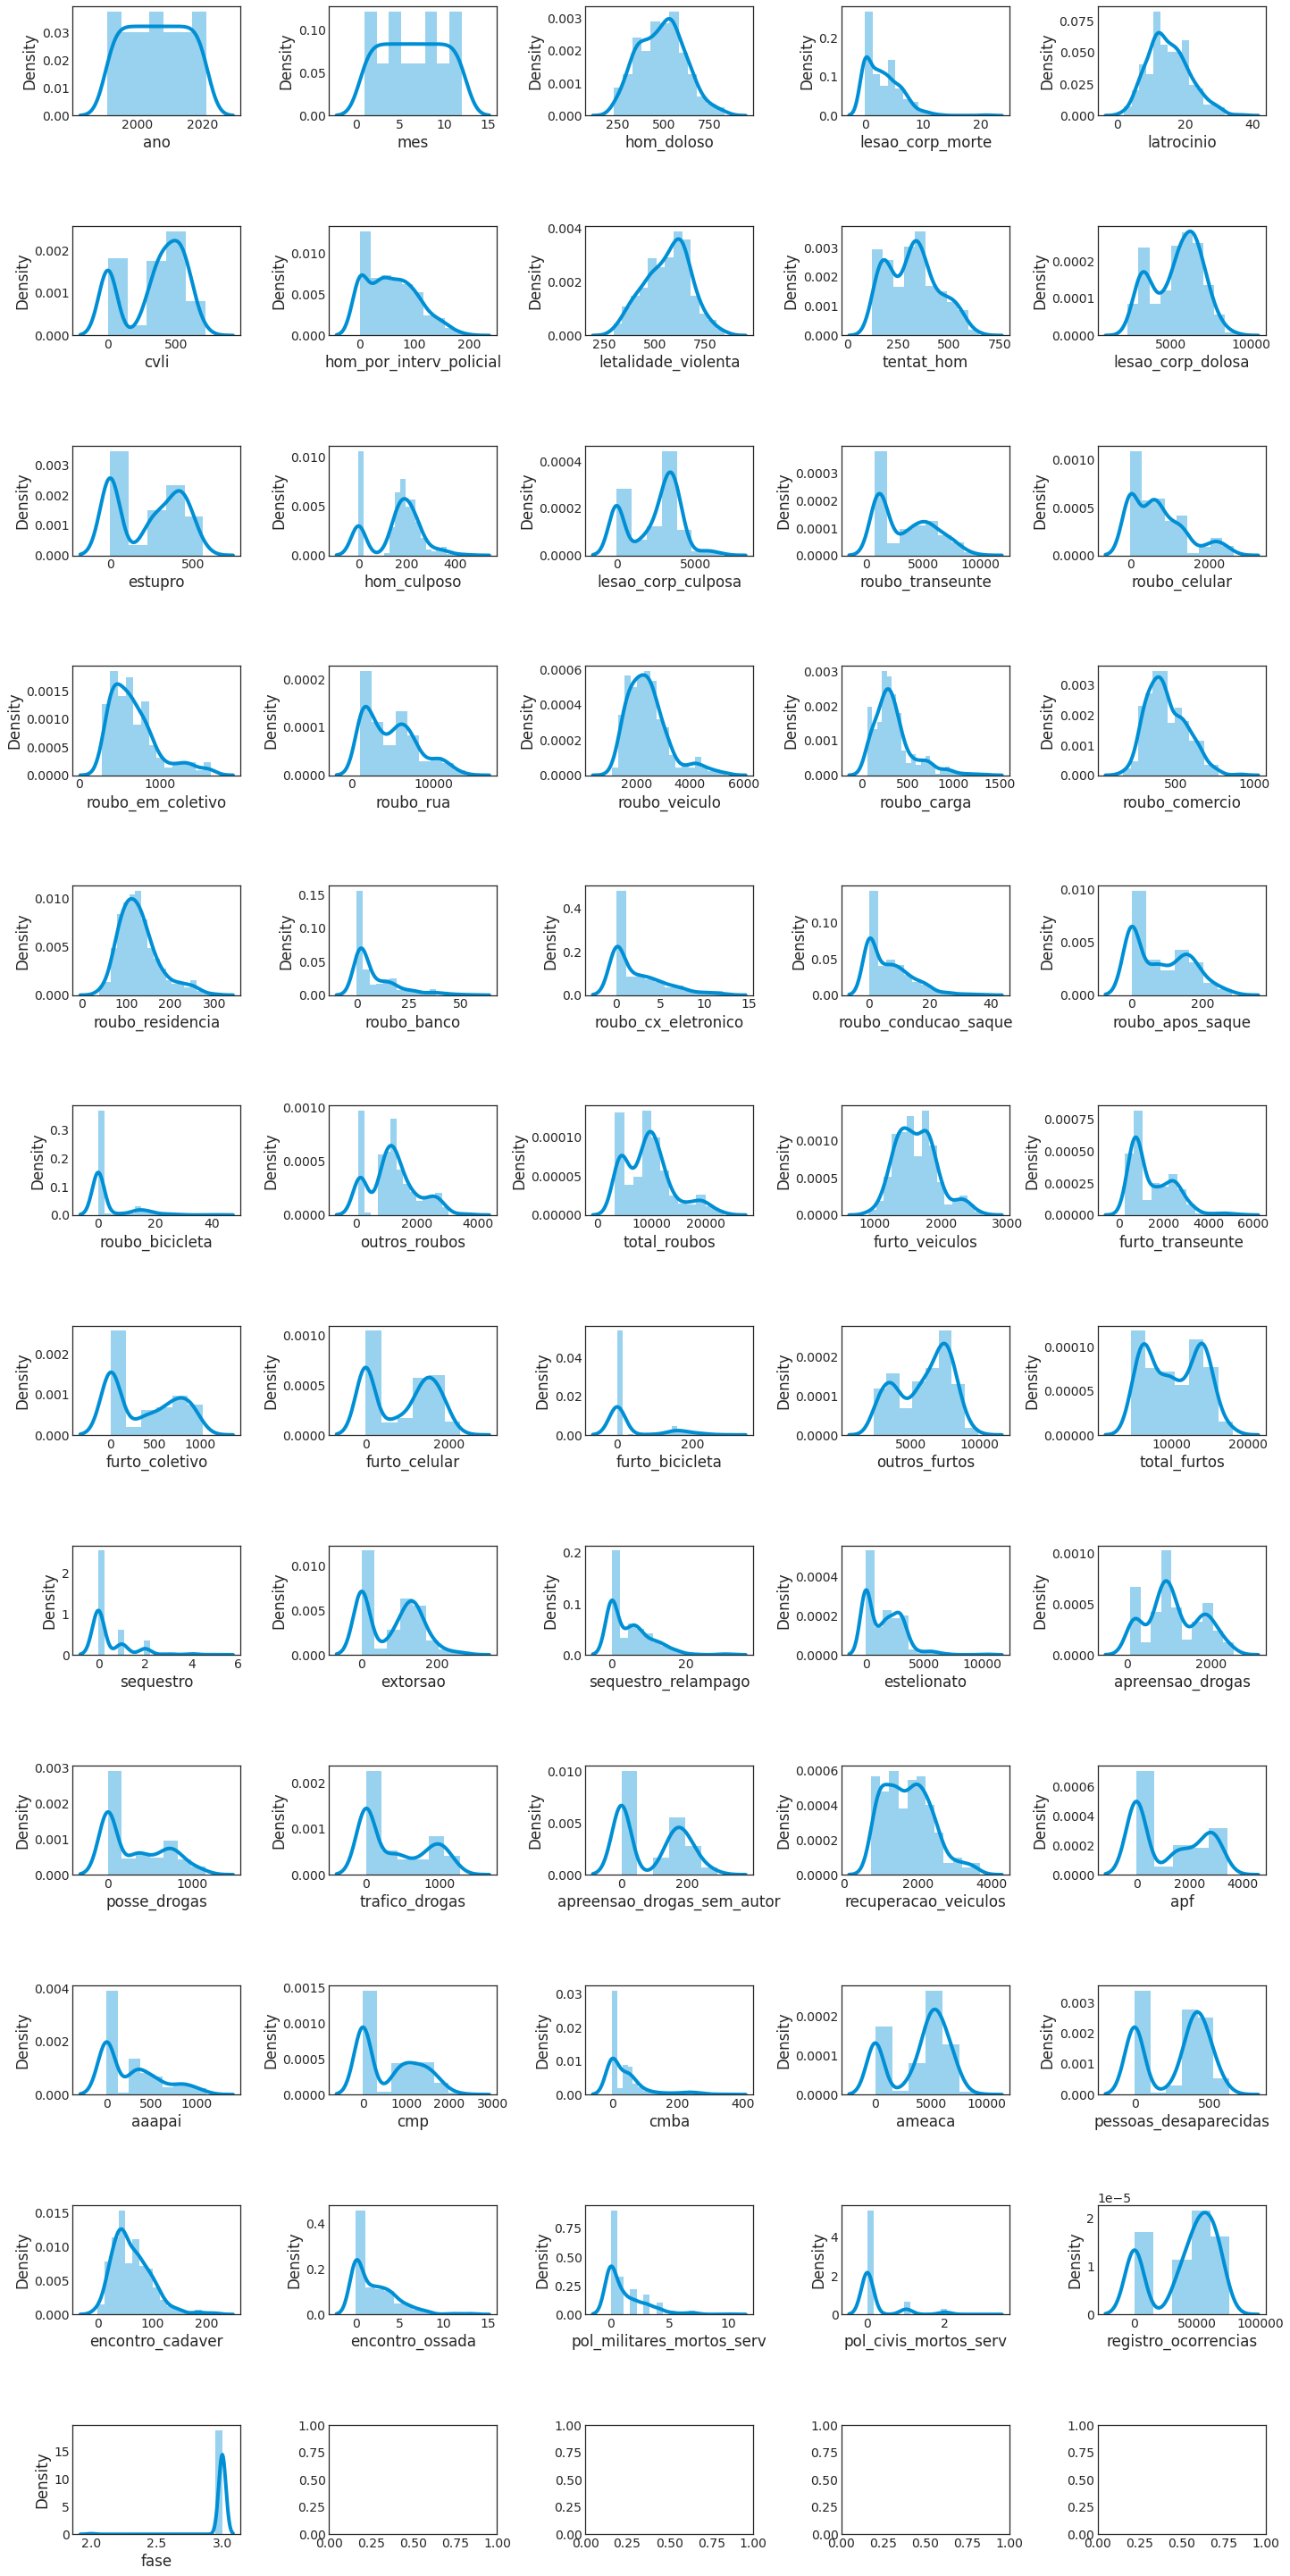

In [13]:
fig, axs = plt.subplots(ncols=5, nrows=12, figsize=(20, 40))
axs = axs.flatten()
for idx, (k, v) in enumerate(data.items()):
    sns.distplot(v, ax=axs[idx])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

# Data Pre-processing
Observing the correalation between every column and the specific correlation "ano":

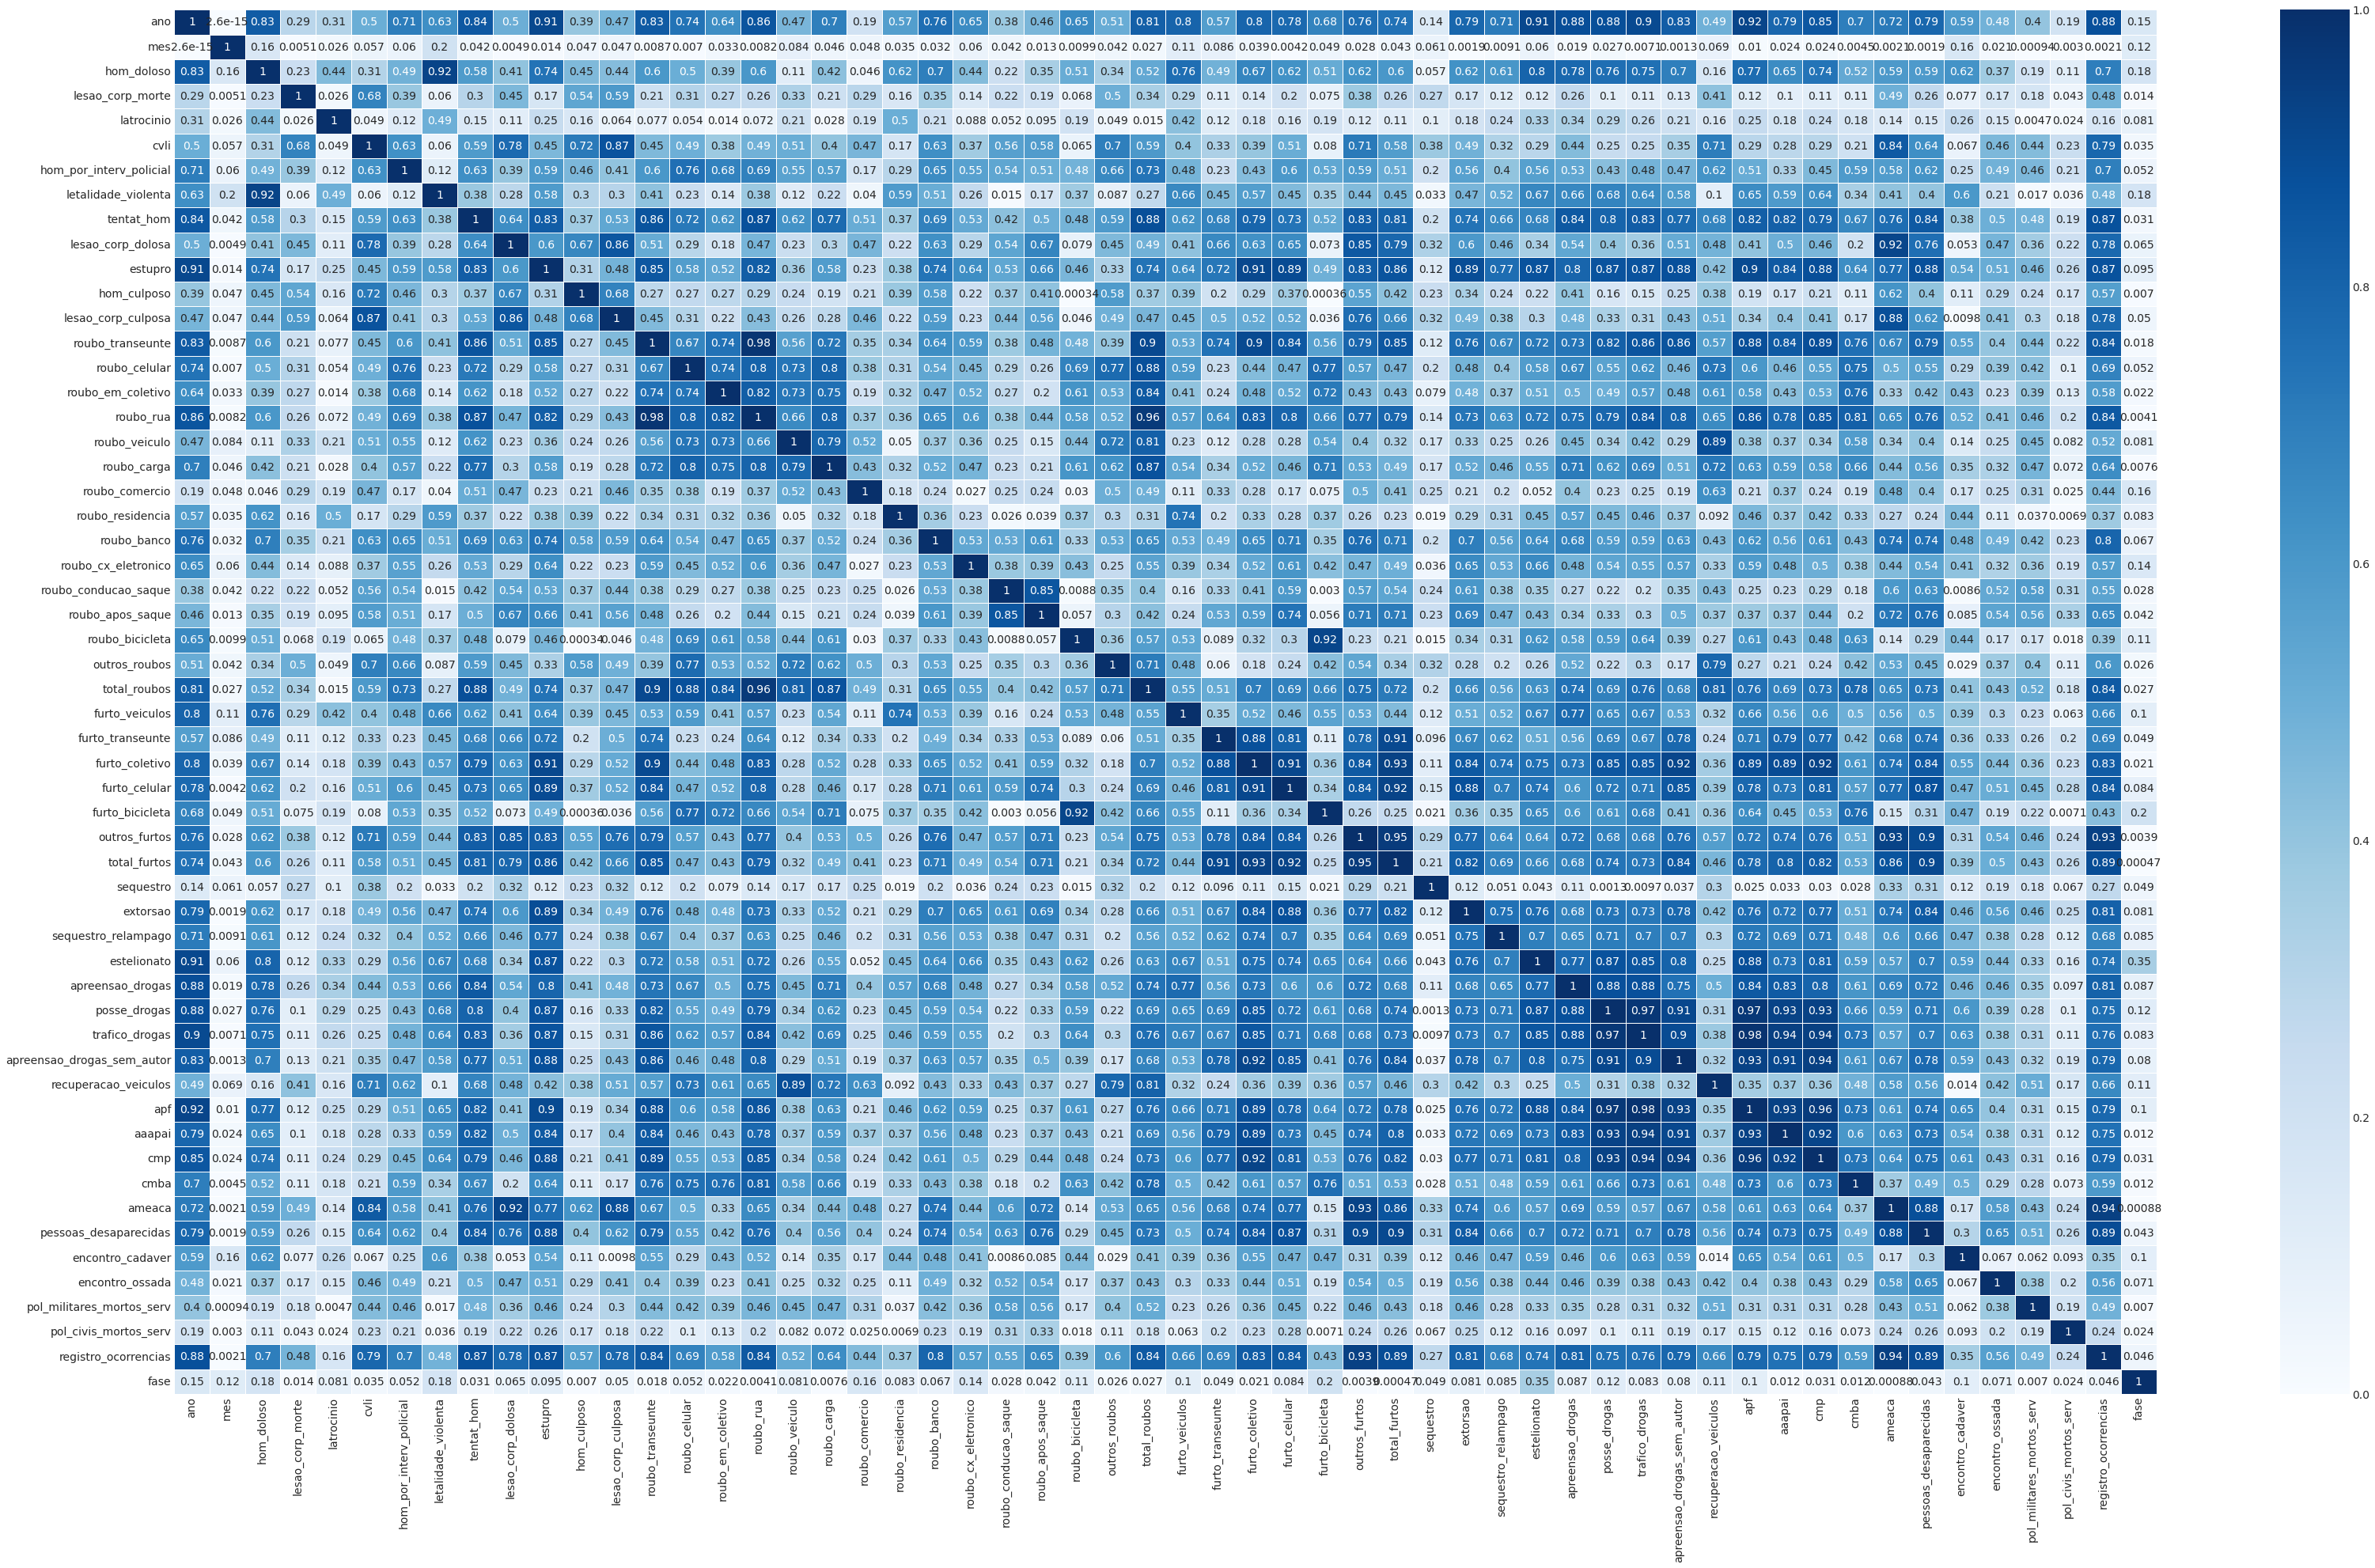

Column                        correlation with ano
--------------------------  ----------------------
apf                                    0.918127
estupro                                0.908947
estelionato                            0.908748
trafico_drogas                         0.901467
apreensao_drogas                       0.884717
posse_drogas                           0.880731
registro_ocorrencias                   0.878007
roubo_rua                              0.857359
cmp                                    0.850882
tentat_hom                             0.843927
roubo_transeunte                       0.832069
hom_doloso                             0.829835
apreensao_drogas_sem_autor             0.826777
total_roubos                           0.814008
furto_veiculos                         0.797271
furto_coletivo                         0.796474
aaapai                                 0.790611
pessoas_desaparecidas                  0.788923
extorsao                          

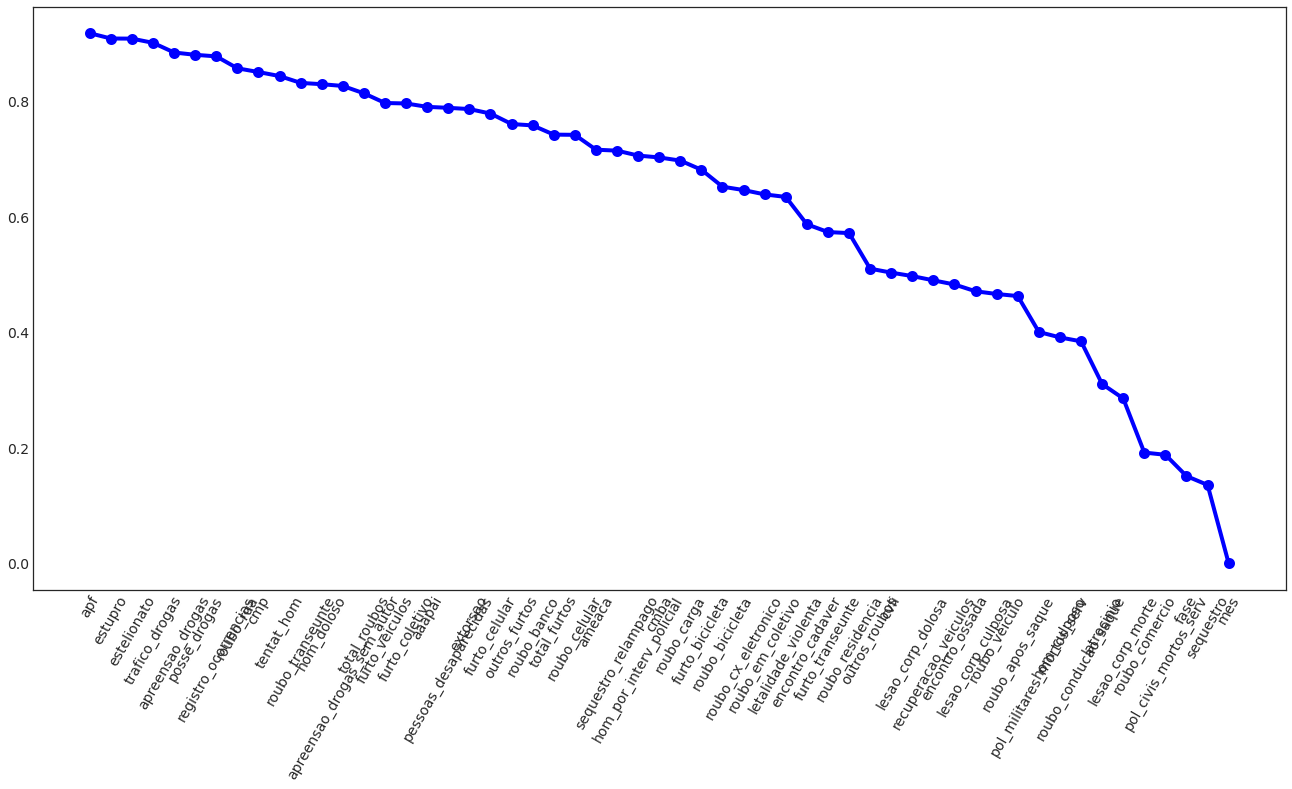

In [14]:
plt.figure(figsize=(50,30))
corr=data.corr()
sns.heatmap(abs(corr),lw=1,annot=True,cmap="Blues")
plt.show()

C=abs(corr["ano"]).sort_values(ascending=False)[1:]
df_corr = C.to_frame()
print(tabulate(df_corr, headers=["Column","correlation with ano"]))

plt.figure(figsize=(20,10))
plt.plot(C.index,C,color="blue")
plt.scatter(C.index,C,color="blue",lw=5)
plt.xticks(rotation=60)
plt.show()